# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     727.3
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           9.51e-39
Time:                        09:54:14   Log-Likelihood:                -3.3219
No. Observations:                  50   AIC:                             14.64
Df Residuals:                      46   BIC:                             22.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1664      0.092     56.223      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.70298916  5.13696663  5.53734006  5.8811878   6.15386049  6.35138795
  6.48113142  6.56057414  6.61444895  6.67067468  6.75576921  6.89049267
  7.08643657  7.34411938  7.65290131  7.99273244  8.33744685  8.65906159
  8.93237422  9.13910349  9.27089289  9.33068363  9.33223138  9.29784624
  9.25472731  9.23049389  9.24864774  9.32471183  9.46367989  9.65919603
  9.89459896 10.14565938 10.3845608  10.58446973 10.72394432 10.79045719
 10.78245367 10.70960721 10.59123006 10.45310033 10.32322672 10.22724674
 10.1842146  10.20347059 10.28310656 10.41027935 10.56332097 10.71529851
 10.83843921 10.90869339]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.89952467 10.77843996 10.56193311 10.28759154 10.00489348  9.76309403
  9.59916577  9.52874655  9.54231087  9.607502  ]


## Plot comparison

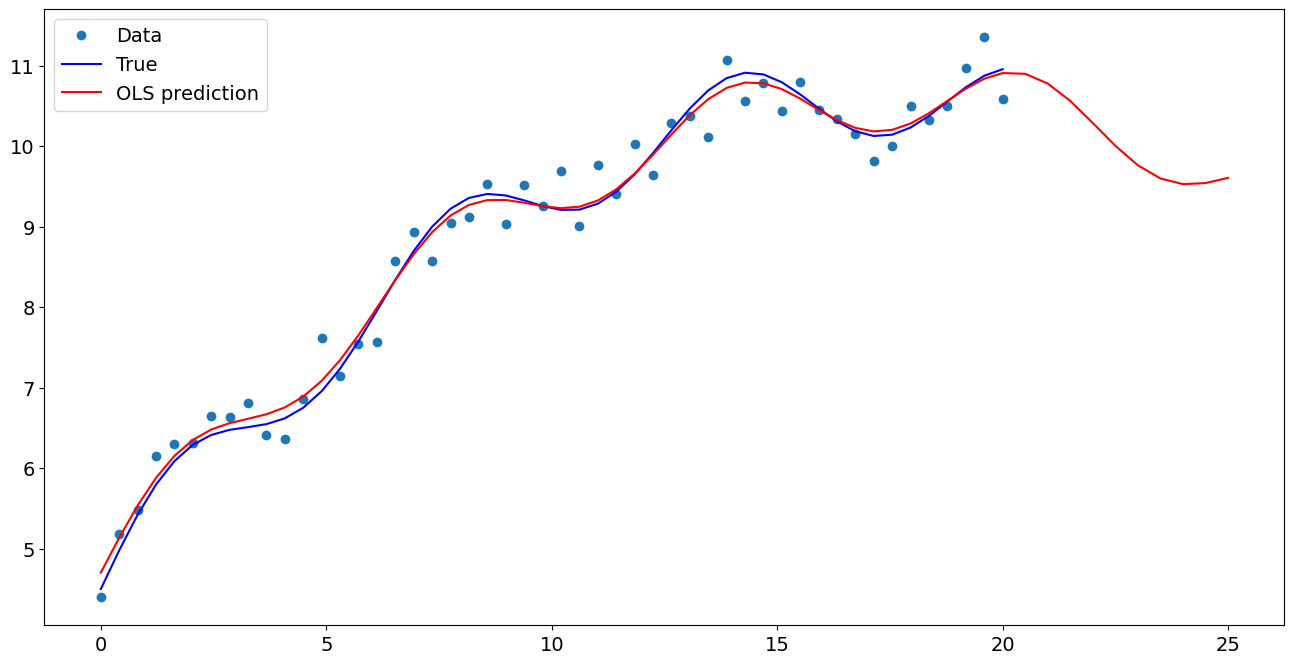

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.166386
x1                  0.476445
np.sin(x1)          0.420588
I((x1 - 5) ** 2)   -0.018536
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.899525
1    10.778440
2    10.561933
3    10.287592
4    10.004893
5     9.763094
6     9.599166
7     9.528747
8     9.542311
9     9.607502
dtype: float64